# Table of Contents
 <p><div class="lev1"><a href="#Recitation---Presidential-Election-Forecating"><span class="toc-item-num">1&nbsp;&nbsp;</span>Recitation - Presidential Election Forecating</a></div><div class="lev2"><a href="#Dealing-with-missing-values"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dealing with missing values</a></div><div class="lev2"><a href="#A-Sophisticated-Baseline-Method"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>A Sophisticated Baseline Method</a></div><div class="lev2"><a href="#Logistic-Regression-Models"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Logistic Regression Models</a></div><div class="lev2"><a href="#Test-set-predictions"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Test set predictions</a></div>

Recitation - Presidential Election Forecating
=============================================

In this recitation, we will be using the dataset PollingData.csv. This data comes from RealClearPolitics.com.

In [1]:
polling <- read.csv("PollingData.csv")
str(polling)

'data.frame':	145 obs. of  7 variables:
 $ State     : Factor w/ 50 levels "Alabama","Alaska",..: 1 1 2 2 3 3 3 4 4 4 ...
 $ Year      : int  2004 2008 2004 2008 2004 2008 2012 2004 2008 2012 ...
 $ Rasmussen : int  11 21 NA 16 5 5 8 7 10 NA ...
 $ SurveyUSA : int  18 25 NA NA 15 NA NA 5 NA NA ...
 $ DiffCount : int  5 5 1 6 8 9 4 8 5 2 ...
 $ PropR     : num  1 1 1 1 1 ...
 $ Republican: int  1 1 1 1 1 1 1 1 1 1 ...


We have a total a 145 observations (1 state in a particular year).

Something we notice right off the bat
is that even though there are 50 states and three election
years, so we would expect 150 observations,
we actually only have 145 observations in the data frame.

In [2]:
table(polling$Year)


2004 2008 2012 
  50   50   45 

What happened here is
that pollsters were so sure about the five missing states
that they didn't perform any polls in the months leading up
to the 2012 election.

So since these states are particularly easy to predict,
we feel pretty comfortable moving forward, making
predictions just for the 45 remaining states.

We also notice that some values are missing (NA).

In [19]:
summary(polling)

         State          Year        Rasmussen          SurveyUSA       
 Arizona    :  3   Min.   :2004   Min.   :-41.0000   Min.   :-33.0000  
 Arkansas   :  3   1st Qu.:2004   1st Qu.: -8.0000   1st Qu.:-11.7500  
 California :  3   Median :2008   Median :  1.0000   Median : -2.0000  
 Colorado   :  3   Mean   :2008   Mean   :  0.0404   Mean   : -0.8243  
 Connecticut:  3   3rd Qu.:2012   3rd Qu.:  8.5000   3rd Qu.:  8.0000  
 Florida    :  3   Max.   :2012   Max.   : 39.0000   Max.   : 30.0000  
 (Other)    :127                  NA's   :46         NA's   :71        
   DiffCount           PropR          Republican    
 Min.   :-19.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: -6.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :  1.000   Median :0.6250   Median :1.0000  
 Mean   : -1.269   Mean   :0.5259   Mean   :0.5103  
 3rd Qu.:  4.000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   : 11.000   Max.   :1.0000   Max.   :1.0000  
                                                    

## Dealing with missing values

There are missing values in the Rasmussen polling and SurveyUSA.

We can't just remove all the observations involved because we would be throwing away more than 50% of our data.

We can't also just remove the two variables involves because they bring a qualitative insight in our study compared to the other pollings we have.

The best solution here would be applying Multiple Imputations, that is replacing the NA's by average values to respect the trend of the polling.

We will use for that the MICE package (Multiple Imputations by Chained Equations) to put in place this mathematically sophisticated approach.

In [20]:
library(mice)

Loading required package: Rcpp
mice 2.25 2015-11-09


We're going to limit our data frame to just
the four polling related variables
before we actually perform multiple imputation.

In [22]:
simple <- polling[c("Rasmussen", "SurveyUSA", "PropR", "DiffCount")]
summary(simple)

   Rasmussen          SurveyUSA            PropR          DiffCount      
 Min.   :-41.0000   Min.   :-33.0000   Min.   :0.0000   Min.   :-19.000  
 1st Qu.: -8.0000   1st Qu.:-11.7500   1st Qu.:0.0000   1st Qu.: -6.000  
 Median :  1.0000   Median : -2.0000   Median :0.6250   Median :  1.000  
 Mean   :  0.0404   Mean   : -0.8243   Mean   :0.5259   Mean   : -1.269  
 3rd Qu.:  8.5000   3rd Qu.:  8.0000   3rd Qu.:1.0000   3rd Qu.:  4.000  
 Max.   : 39.0000   Max.   : 30.0000   Max.   :1.0000   Max.   : 11.000  
 NA's   :46         NA's   :71                                           

The multiple imputation is a process that involves RNG, so let's set a seed.

In [23]:
set.seed(144)

In [24]:
imputed <- complete(mice(simple))


 iter imp variable
  1   1  Rasmussen  SurveyUSA
  1   2  Rasmussen  SurveyUSA
  1   3  Rasmussen  SurveyUSA
  1   4  Rasmussen  SurveyUSA
  1   5  Rasmussen  SurveyUSA
  2   1  Rasmussen  SurveyUSA
  2   2  Rasmussen  SurveyUSA
  2   3  Rasmussen  SurveyUSA
  2   4  Rasmussen  SurveyUSA
  2   5  Rasmussen  SurveyUSA
  3   1  Rasmussen  SurveyUSA
  3   2  Rasmussen  SurveyUSA
  3   3  Rasmussen  SurveyUSA
  3   4  Rasmussen  SurveyUSA
  3   5  Rasmussen  SurveyUSA
  4   1  Rasmussen  SurveyUSA
  4   2  Rasmussen  SurveyUSA
  4   3  Rasmussen  SurveyUSA
  4   4  Rasmussen  SurveyUSA
  4   5  Rasmussen  SurveyUSA
  5   1  Rasmussen  SurveyUSA
  5   2  Rasmussen  SurveyUSA
  5   3  Rasmussen  SurveyUSA
  5   4  Rasmussen  SurveyUSA
  5   5  Rasmussen  SurveyUSA


The output here shows us that five rounds of imputation have been run, and now all of the variables have been filled in.

In [25]:
summary(imputed)

   Rasmussen         SurveyUSA           PropR          DiffCount      
 Min.   :-41.000   Min.   :-33.000   Min.   :0.0000   Min.   :-19.000  
 1st Qu.: -8.000   1st Qu.:-11.000   1st Qu.:0.0000   1st Qu.: -6.000  
 Median :  3.000   Median :  1.000   Median :0.6250   Median :  1.000  
 Mean   :  1.731   Mean   :  1.517   Mean   :0.5259   Mean   : -1.269  
 3rd Qu.: 11.000   3rd Qu.: 18.000   3rd Qu.:1.0000   3rd Qu.:  4.000  
 Max.   : 39.000   Max.   : 30.000   Max.   :1.0000   Max.   : 11.000  

And we can also check here in the summary that there is no NA's anymore.



Let's now erase the previous pollings with the newly imputed ones.

In [26]:
polling$Rasmussen <- imputed$Rasmussen
polling$SurveyUSA <- imputed$SurveyUSA
summary(polling)

         State          Year        Rasmussen         SurveyUSA      
 Arizona    :  3   Min.   :2004   Min.   :-41.000   Min.   :-33.000  
 Arkansas   :  3   1st Qu.:2004   1st Qu.: -8.000   1st Qu.:-11.000  
 California :  3   Median :2008   Median :  3.000   Median :  1.000  
 Colorado   :  3   Mean   :2008   Mean   :  1.731   Mean   :  1.517  
 Connecticut:  3   3rd Qu.:2012   3rd Qu.: 11.000   3rd Qu.: 18.000  
 Florida    :  3   Max.   :2012   Max.   : 39.000   Max.   : 30.000  
 (Other)    :127                                                     
   DiffCount           PropR          Republican    
 Min.   :-19.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: -6.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :  1.000   Median :0.6250   Median :1.0000  
 Mean   : -1.269   Mean   :0.5259   Mean   :0.5103  
 3rd Qu.:  4.000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   : 11.000   Max.   :1.0000   Max.   :1.0000  
                                                    

## A Sophisticated Baseline Method

We can now start building models !

The first thing we're going to do is split our data into a training and a testing set.

For this problem, we are going to train on data from the 2004 and 2008 elections,
and we are going to test on data from the 2012 presidential election.

In [29]:
Train <- subset(polling, Year == 2004 | Year == 2008)
Test <- subset(polling, Year == 2012)

Let's build now a baseline model based on the breakdown of the dependant variable.

In [30]:
table(Train$Republican)


 0  1 
47 53 

What we can see here is that in 47 of the 100 training
observations, the Democrat won the state,
and in 53 of the observations, the Republican won the state.

So our simple baseline model is always
going to predict the more common outcome, which
is that the Republican is going to win the state.
And we see that the simple baseline model
will have accuracy of 53% on the training set.

But this is a pretty weak model.

We will build a smarter baseline model based upon the Rasmussen polling winner.

For that, we will use the sign function.

[1] 1

[1] -1

[1] 0

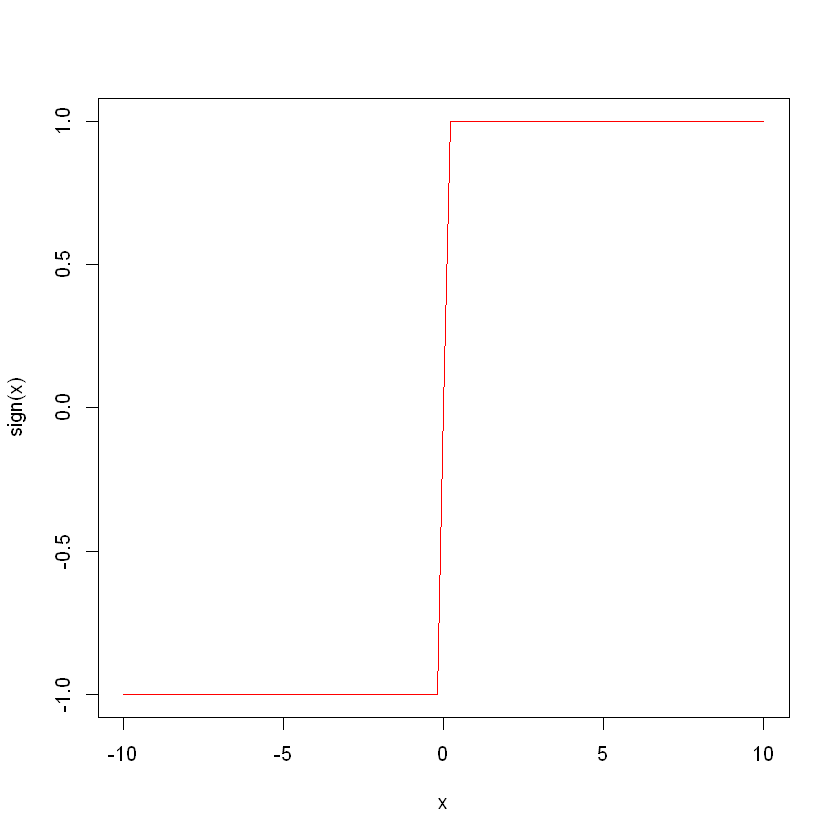

In [36]:
sign(20)
sign(-10)
sign(0)
curve(sign, from=-10, to=10, col="red")


-41 -28 -27 -24 -23 -22 -20 -19 -17 -15 -13 -12 -11 -10  -8  -7  -6  -5  -4  -3 
  1   1   1   3   1   2   1   1   2   4   1   3   3   2   3   3   1   1   3   1 
 -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  19  21 
  2   2   3   2   2   2   3   6   4   1   1   2   6   2   6   3   1   4   5   1 
 31  32  34  39 
  1   1   1   1 

Let's take a look at the breakdown of that poll.

In [38]:
table(sign(Train$Rasmussen))


-1  0  1 
42  3 55 

What we can see is that in 56 of the 100 training set
observations, the smart baseline predicted
that the Republican was going to win.

In 42 instances, it predicted the Democrat.

And in two instances, it was inconclusive.

Let's compare this baseline model to the actual result (who won the elections).

In [39]:
table(Train$Republican, sign(Train$Rasmussen))

   
    -1  0  1
  0 42  2  3
  1  0  1 52

We have 42 observations where the Rasmussen smart baseline predicted the Democrat would win, and the Democrat actually did win.

There were 52 observations where the smart baseline predicted the Republican would win, and the Republican actually did win.

And finally, there were four mistakes. There were four times where the smart baseline model predicted.

This is a much more reasonable baseline than the one who always predicts a Republican success.

## Logistic Regression Models

Before really starting the modelization process, we should consider the possibility that there could be multicolinearity.

It is indeed normal to suspect this because we are basing our models on variables that aims to measure the same thing (the performance of candidates in particular states).

Let's look at the correlation of the training set.

In [40]:
cor(Train)

ERROR: Error in cor(Train): 'x' must be numeric


Hm. Error in cor(Train): 'x' must be numeric.

Let's look at the structure of our data.

In [41]:
str(Train)

'data.frame':	100 obs. of  7 variables:
 $ State     : Factor w/ 50 levels "Alabama","Alaska",..: 1 1 2 2 3 3 4 4 5 5 ...
 $ Year      : int  2004 2008 2004 2008 2004 2008 2004 2008 2004 2008 ...
 $ Rasmussen : int  11 21 16 16 5 5 7 10 -11 -27 ...
 $ SurveyUSA : int  18 25 21 21 15 8 5 9 -11 -24 ...
 $ DiffCount : int  5 5 1 6 8 9 8 5 -8 -5 ...
 $ PropR     : num  1 1 1 1 1 1 1 1 0 0 ...
 $ Republican: int  1 1 1 1 1 1 1 1 0 0 ...


There it is. The name of the states are not numerical values.

In [44]:
str(Train[c("Rasmussen", "SurveyUSA", "PropR", "DiffCount", "Republican")])

'data.frame':	100 obs. of  5 variables:
 $ Rasmussen : int  11 21 16 16 5 5 7 10 -11 -27 ...
 $ SurveyUSA : int  18 25 21 21 15 8 5 9 -11 -24 ...
 $ PropR     : num  1 1 1 1 1 1 1 1 0 0 ...
 $ DiffCount : int  5 5 1 6 8 9 8 5 -8 -5 ...
 $ Republican: int  1 1 1 1 1 1 1 1 0 0 ...


In [59]:
cor(Train[c("Rasmussen", "SurveyUSA", "PropR", "DiffCount", "Republican")])

,Rasmussen,SurveyUSA,PropR,DiffCount,Republican
Rasmussen,1.0000000,0.9194508,0.8404803,0.5124098,0.8021191
SurveyUSA,0.9194508,1.0000000,0.8756581,0.5541816,0.8205806
PropR,0.8404803,0.8756581,1.0000000,0.8273785,0.9484204
DiffCount,0.5124098,0.5541816,0.8273785,1.0000000,0.8092777
Republican,0.8021191,0.8205806,0.9484204,0.8092777,1.0000000


We can see that some of the variables are highly correlated, like Rasmussen and SurveyUSA.

Let's first try something simple, like a one-model logistic regression.

The highest correlated variable to the outcome (Republican) is PropR.

In [46]:
mod1 <- glm(Republican ~ PropR, data=Train, family=binomial)

In [48]:
summary(mod1)


Call:
glm(formula = Republican ~ PropR, family = binomial, data = Train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.22880  -0.06541   0.10260   0.10260   1.37392  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -6.146      1.977  -3.108 0.001882 ** 
PropR         11.390      3.153   3.613 0.000303 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.269  on 99  degrees of freedom
Residual deviance:  15.772  on 98  degrees of freedom
AIC: 19.772

Number of Fisher Scoring iterations: 8


For this variable,

- the coefficients are positive,
- we have a lot of stars,
- the AIC is pretty strong.

Let's try this model at prediction.

In [50]:
pred1 <- predict(mod1, type="response")  # we first make predictions on the training set

In [51]:
thresh <- .5

In [52]:
table(Train$Republican, pred1 >= thresh)

   
    FALSE TRUE
  0    45    2
  1     2   51

Let's try now to add another variable to our model.

For example, there is Rasmussen and DiffCount or SurveyUSA and DiffCount that shows a minimal intercorrelation.

In [61]:
cor(Train[c("Rasmussen", "SurveyUSA", "PropR", "DiffCount", "Republican")])[,"DiffCount"]

Rasmussen  SurveyUSA      PropR  DiffCount Republican 
 0.5124098  0.5541816  0.8273785  1.0000000  0.8092777

Let's try with SurveyUSA and DiffCount.

In [62]:
mod2 <- glm(Republican ~ SurveyUSA + DiffCount, data=Train, family=binomial)

In [63]:
pred2 <- predict(mod2, type="response")

In [64]:
table(Train$Republican, pred2 >= thresh)

   
    FALSE TRUE
  0    45    2
  1     1   52

We made one less mistake (3 instead of 4). It's a little better but not too impressive.

Let's check the summary for a better insight.

In [66]:
summary(mod2)


Call:
glm(formula = Republican ~ SurveyUSA + DiffCount, family = binomial, 
    data = Train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.01196  -0.00698   0.01005   0.05074   1.54975  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -1.1405     1.2456  -0.916   0.3599  
SurveyUSA     0.2976     0.1949   1.527   0.1267  
DiffCount     0.7673     0.4188   1.832   0.0669 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.269  on 99  degrees of freedom
Residual deviance:  12.439  on 97  degrees of freedom
AIC: 18.439

Number of Fisher Scoring iterations: 10


We can see here that 

- the AIC has a smaller value thats suggests a stronger model,
- the two independants variables have positive coefficients,
- but neither of theses variables have much significance (1 star).

There are some strengths and weaknesses here, let's see now on the testing set.

## Test set predictions

Let's check the outcome of the baseline model on the testing set.

In [68]:
table(Test$Republican, sign(Test$Rasmussen))

   
    -1  0  1
  0 18  2  4
  1  0  0 21

There are 

- 18 times where the smart baseline predicted that the Democrat would win and it's correct,
- 21 where it predicted the Republican would win and was correct,
- two times when it was inconclusive,
- and four times where it predicted Republican but the Democrat actually won.

So that's four mistakes and two inconclusive results on the testing set.

We will compare this performance to our Logistic Regression model mod2.

In [69]:
TestPrediction <- predict(mod2, newdata=Test, family="response")

In [70]:
table(Test$Republican, TestPrediction > thresh)

   
    FALSE TRUE
  0    23    1
  1     0   21

Yay, we were correct for all but one observation.

We could change the thresh value for something different than 0.5 using a ROC curve, but that does not make any sense since we want to predict the outcome of an election. So we are okay with the cutoff setting.

Since we made 1 mistake, it could be interesting to check on that one and try to understand what happened here. Let's extract this one were we predicted a victory of a Republican and a Democrat won.

In [72]:
mistake <- subset(Test, TestPrediction > thresh & Republican == 0)
print(mistake)

     State Year Rasmussen SurveyUSA DiffCount     PropR Republican
24 Florida 2012         2         0         6 0.6666667          0


So, 

- the Rasmussen poll gave the Republican a two percentage point lead, which is not that big,
- SurveyUSA called a tie,
- DiffCount said there were only six more polls that predicted Republican than Democrat,

Eventually, two thirds of the polls predicted the Republican was going to win. But actually in this case, the Republican didn't win.

Barack Obama won the state of Florida in 2012 over Mitt Romney.